# TP ENSEMBLE LEARNING

## ENSEMBLE LEARNING : CLASSIFICATION OF MNIST

In [19]:
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn import ensemble
from sklearn.metrics import ConfusionMatrixDisplay, f1_score
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation 
import tensorflow.keras.utils
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import EarlyStopping
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

In [21]:
pip install pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [49]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# Load Digits dataset
data = load_digits()
X, y = data.data, data.target

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Printing the shapes of the datasets
print('Training data shape:', x_train.shape)
print('Training labels shape:', y_train.shape)
print('Testing data shape:', x_test.shape)
print('Testing labels shape:', y_test.shape)


Training data shape: (1437, 64)
Training labels shape: (1437,)
Testing data shape: (360, 64)
Testing labels shape: (360,)


### USING BAGGING

- **Bagging (Bootstrap Aggregating)**: 
  - Involves training multiple models on different subsets of data.
  - Each model is trained independently.

- **Process**: 
  1. **Bootstrap Sampling**: 
     - Randomly select samples from the dataset with replacement to create subsets.
  2. **Training**: 
     - Each subset trains a separate model (decision tree in RandomForest).
  3. **Combining Predictions**: 
     - For classification, use majority voting.
     - For regression, average the predictions.

- **Benefits**: 
  - **Reduces Overfitting**: Less risk compared to single complex models.
  - **Improves Accuracy**: Combining multiple models often leads to better performance.
  - **Stability**: Handles datasets with high variance effectively.

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score, log_loss

# Load dataset (using Digits as an example)
digits = load_digits()
X, y = digits.data, digits.target

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid to search
hyperparam = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Create the base model to tune
rf = RandomForestClassifier(random_state=42)

# Perform a random search over the parameter grid
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
random_search.fit(x_train, y_train)

# Best hyperparameters
print("Best hyperparameters:", random_search.best_params_)

# Evaluate the best model
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(x_test)
y_pred_proba = best_rf.predict_proba(x_test)

accuracy = accuracy_score(y_test, y_pred)
log_loss_val = log_loss(y_test, y_pred_proba)

print(f'Accuracy of the best model: {accuracy}')
print(f'Log Loss of the best model: {log_loss_val}')


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Accuracy of the best model: 0.9777777777777777
Log Loss of the best model: 0.2355630081994241


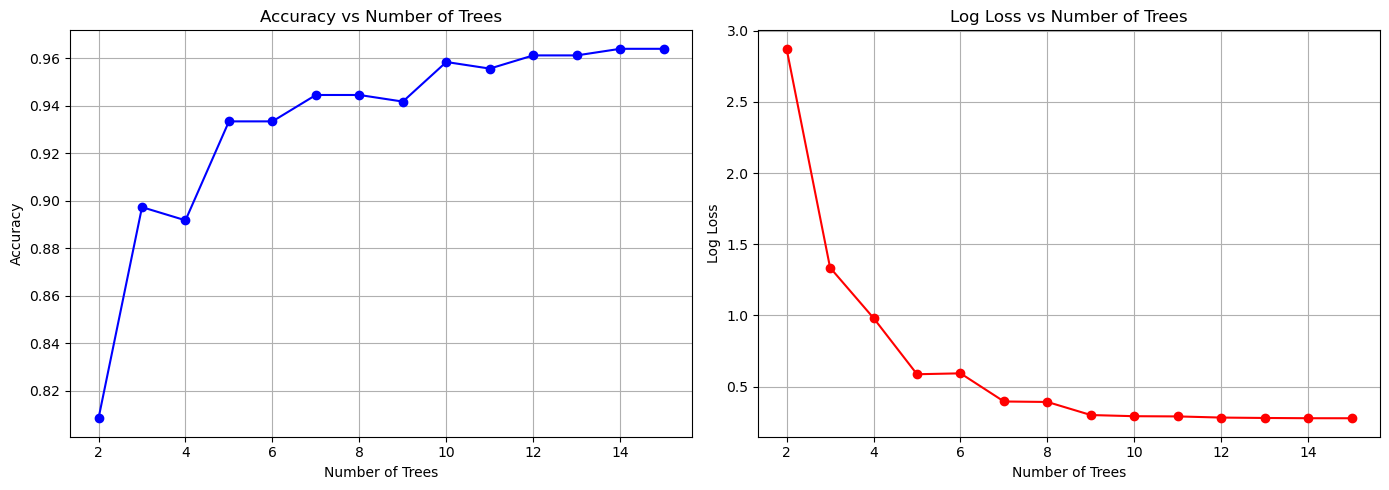

In [58]:
import matplotlib.pyplot as plt

# Assuming 'random_search' has been performed and the best parameters have been found

# Retrieve the best 'max_depth' from the best parameters
best_max_depth = random_search.best_params_['max_depth']

# Define a new range for 'n_estimators' if needed
n_estimators_range = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]  # You can adjust this range as needed

# Lists to store the results
accuracies = []
log_losses = []

# Iterate over the range of 'n_estimators', using the best 'max_depth' from RandomizedSearchCV
for n_estimators in n_estimators_range:
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=best_max_depth, random_state=42)
    clf.fit(x_train, y_train)
    
    y_pred = clf.predict(x_test)
    y_pred_proba = clf.predict_proba(x_test)
    
    accuracies.append(accuracy_score(y_test, y_pred))
    log_losses.append(log_loss(y_test, y_pred_proba))

# Plotting the results on two separate graphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Subplot for Accuracy
ax1.plot(n_estimators_range, accuracies, marker='o', color='blue', linestyle='-')
ax1.set_title('Accuracy vs Number of Trees')
ax1.set_xlabel('Number of Trees')
ax1.set_ylabel('Accuracy')
ax1.grid(True)

# Subplot for Log Loss
ax2.plot(n_estimators_range, log_losses, marker='o', color='red', linestyle='-')
ax2.set_title('Log Loss vs Number of Trees')
ax2.set_xlabel('Number of Trees')
ax2.set_ylabel('Log Loss')
ax2.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


## USING BOOSTING ALGORITHM

#### Basic Principle of Boosting

- **Sequential Training**: Boosting trains models sequentially. Each model learns from the errors made by the previous one.
- **Focus on Errors**: Boosting emphasizes the training instances that previous models misclassified.
- **Weighted Sum**: The final model is a weighted sum of the weak learners, giving more weight to the more accurate learners.

#### AdaBoost (Adaptive Boosting)

- **Start with Equal Weights**: Initially, all training instances are equally weighted.
- **Train Initial Model**: A weak learner is trained on the weighted data.
- **Update Weights**: After each round, the weights of misclassified instances are increased, making them more likely to be correctly classified in the next round.
- **Sequential Model Addition**: New models are added sequentially, each correcting the errors of the previous ones.
- **Final Model**: A weighted combination of all the weak learners, where the weights depend on the accuracy of each learner.


F1 score:  [0.62199476 0.72561887 0.28291446 0.         0.         0.35680577
 0.15716753]


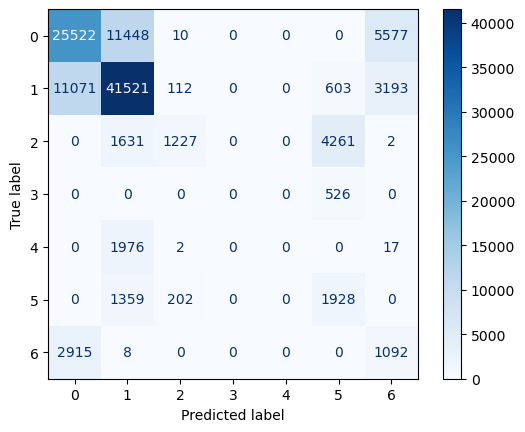

              precision    recall  f1-score   support

           1       0.65      0.60      0.62     42557
           2       0.72      0.73      0.73     56500
           3       0.79      0.17      0.28      7121
           4       0.00      0.00      0.00       526
           5       0.00      0.00      0.00      1995
           6       0.26      0.55      0.36      3489
           7       0.11      0.27      0.16      4015

    accuracy                           0.61    116203
   macro avg       0.36      0.33      0.31    116203
weighted avg       0.65      0.61      0.61    116203



C:\Users\ibrah\anaconda3\envs\SI4\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ibrah\anaconda3\envs\SI4\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ibrah\anaconda3\envs\SI4\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=20, random_state=42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print('F1 score: ', f1_score(y_test, y_pred, average=None))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test, y_pred))


In [48]:
# Utility
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.preprocessing import StandardScaler

# machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier

#seed
seed = 40